#### 𝗟𝗲𝘃𝗲𝗹 - 𝟮 𝗧𝗮𝘀𝗸 -  𝟯

Tᴀsᴋ: 𝗚𝗲𝗼𝗴𝗿𝗮𝗽𝗵𝗶𝗰 𝗔𝗻𝗮𝗹𝘆𝘀𝗶𝘀

• Plot the locations of restaurants on a map using longitude and latitude coordinates.

• Identify any patterns or clusters of restaurants in specific areas.

## Loading dataset

In [9]:
# Import all necessary libraries:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
# Load the dataset:

df = pd.read_csv(r"E:\Cognifyz_Internship\Dataset.csv")
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


## Plot the locations of restaurants on a map using longitude and latitude coordinates.

In [11]:
!pip install geopandas


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15628\1923474866.py:7: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


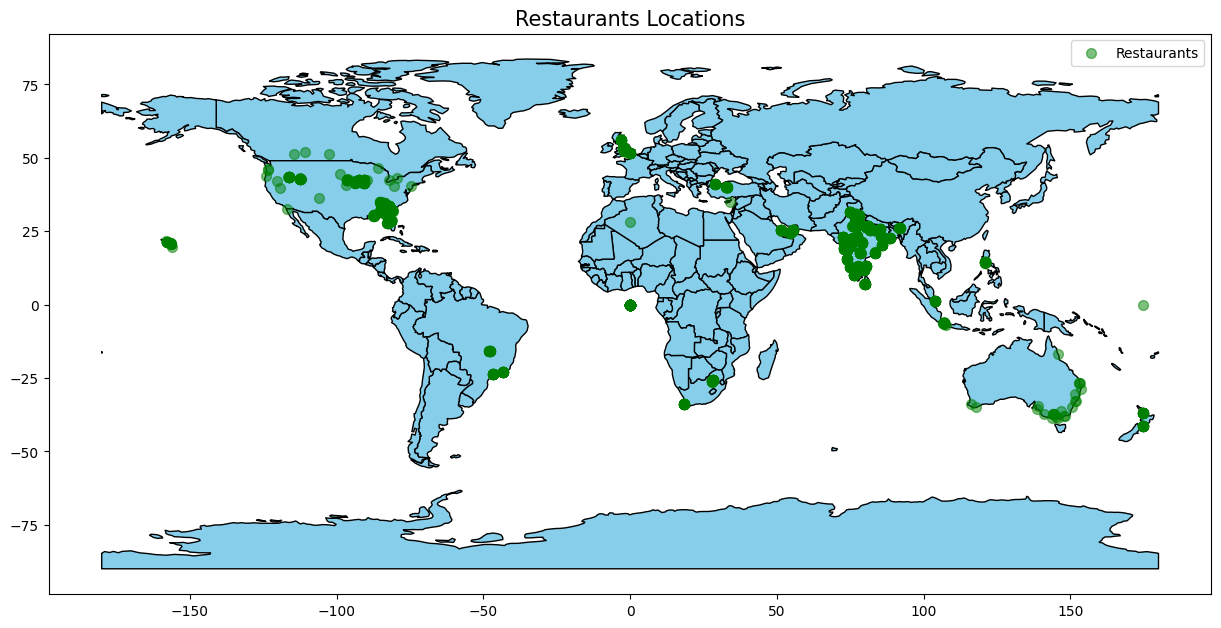

In [12]:
import geopandas as gpd
from shapely.geometry import Point
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)

# Read world map dataset
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot the world map and restaurant locations
fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color='skyblue', edgecolor='black')
gdf.plot(ax=ax, color='green', markersize=50, alpha=0.5, marker='o', label='Restaurants')
ax.set_title('Restaurants Locations', size=15)
plt.legend()
plt.show()

## Identify any patterns or clusters of restaurants in specific areas.

C:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


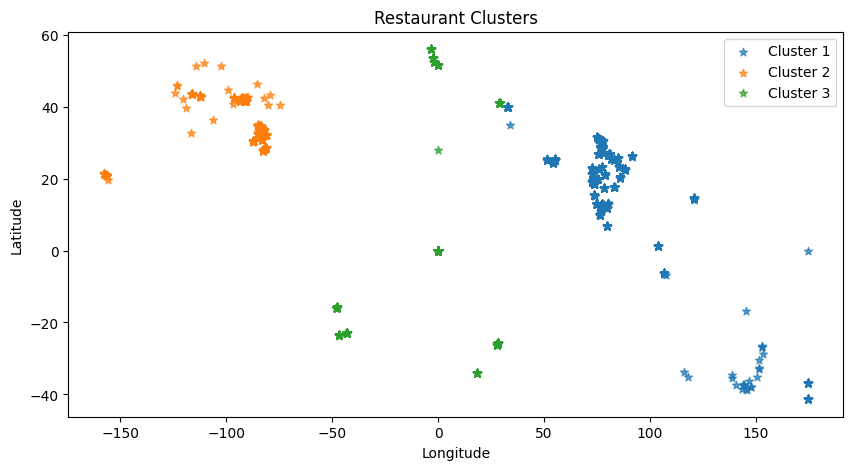

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from ctypes import alignment

# Standardize the latitude and longitude
scaler = StandardScaler()
coordinates = df[['Latitude', 'Longitude']]
scaled_coordinates = scaler.fit_transform(coordinates)

# Perform KMeans clustering
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(coordinates)

# Plot the clusters
plt.figure(figsize=(10, 5))
for cluster in range(num_clusters):
    cluster_df = df.loc[df['cluster'] == cluster]
    plt.scatter(cluster_df['Longitude'], cluster_df['Latitude'], marker="*", alpha=0.7, label=f'Cluster {cluster+1}')
plt.legend()
plt.title('Restaurant Clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()